In [1]:
#K-Means Clusterring
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline
plt.figure(figsize=(7,4))

In [3]:
iris=datasets.load_iris()

x=scale(iris.data) #scale data before cluster
y=pd.DataFrame(iris.target)
variable_names=iris.feature_names
x[0:10,]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [4]:
#K-means clusterring
clusterring=KMeans(n_clusters=3,random_state=5)

clusterring.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [5]:
#Plotting your models output
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns=['Targets']

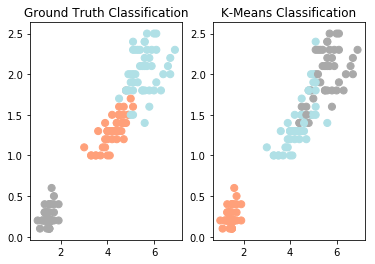

In [9]:
color_theme=np.array(['darkgray','lightsalmon','Powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clusterring.labels_],s=50)
plt.title('K-Means Classification')

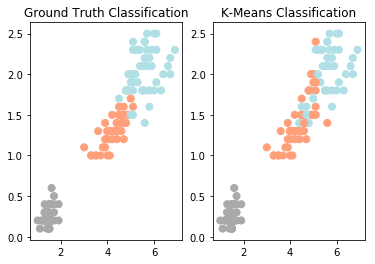

In [11]:
relabel=np.choose(clusterring.labels_,[2,0,1]).astype(np.int64) #since labels are not plotted correctly so change labels. here 0 changes to 2 etc

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[relabel],s=50)
plt.title('K-Means Classification')

In [12]:
#Evaluate Clustering results.

print(classification_report(y,relabel)) #HIgh Precision & high Recall= high accurate model result

#precision : a measure of model relevancy
#Recall: a measure of model completness

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

